<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-07-13 14:17:46.522582


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

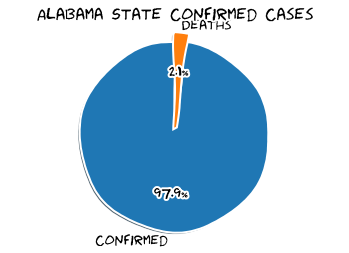

Alabama State Total Population
4887871
Alabama State Confirmed
53587 (1.0963259873265887% of population)
Alabama State Deaths
1121 (2.091925280385168% of confirmed)



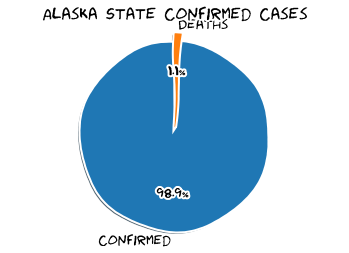

Alaska State Total Population
737438
Alaska State Confirmed
1479 (0.20055923345420226% of population)
Alaska State Deaths
17 (1.1494252873563218% of confirmed)



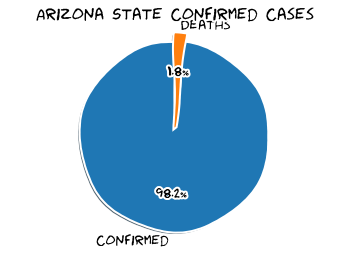

Arizona State Total Population
7171646
Arizona State Confirmed
122467 (1.707655397380183% of population)
Arizona State Deaths
2236 (1.8257979700654052% of confirmed)



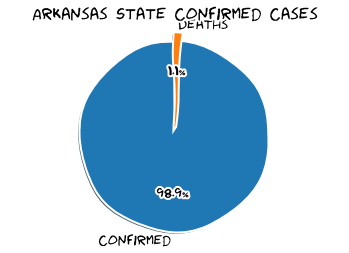

Arkansas State Total Population
3013825
Arkansas State Confirmed
28367 (0.941229168913258% of population)
Arkansas State Deaths
321 (1.131596573483273% of confirmed)



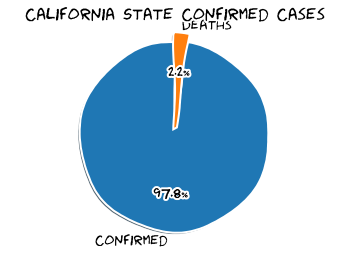

California State Total Population
39557045
California State Confirmed
324543 (0.8204429830387988% of population)
California State Deaths
7051 (2.172593462191451% of confirmed)



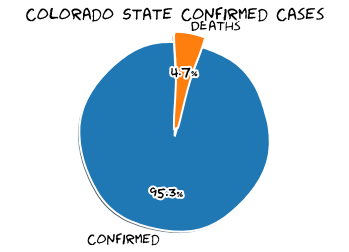

Colorado State Total Population
5695564
Colorado State Confirmed
36895 (0.64778483746298% of population)
Colorado State Deaths
1725 (4.675430275105027% of confirmed)



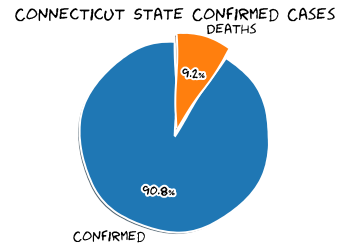

Connecticut State Total Population
3572665
Connecticut State Confirmed
47287 (1.3235777773734734% of population)
Connecticut State Deaths
4348 (9.194916150316153% of confirmed)



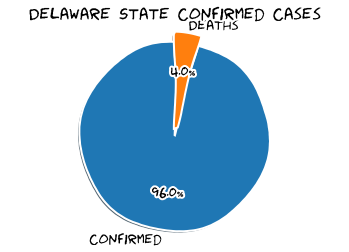

Delaware State Total Population
967171
Delaware State Confirmed
12804 (1.3238610338812888% of population)
Delaware State Deaths
517 (4.037800687285223% of confirmed)



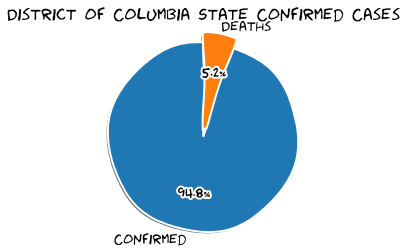

District of Columbia State Total Population
702455
District of Columbia State Confirmed
10847 (1.5441558533998618% of population)
District of Columbia State Deaths
568 (5.236470913616668% of confirmed)



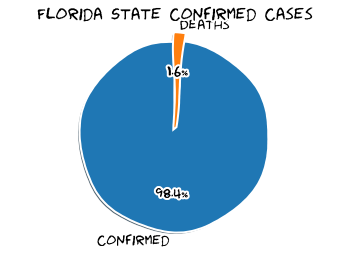

Florida State Total Population
21299325
Florida State Confirmed
269811 (1.2667584536129666% of population)
Florida State Deaths
4242 (1.5722116592726019% of confirmed)



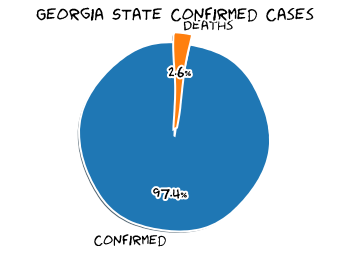

Georgia State Total Population
10519475
Georgia State Confirmed
116935 (1.1116049042371412% of population)
Georgia State Deaths
3003 (2.5680933852140075% of confirmed)



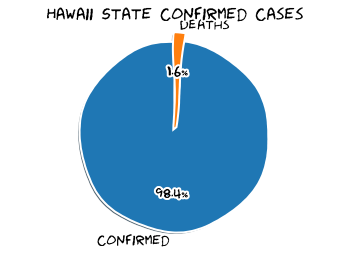

Hawaii State Total Population
1420491
Hawaii State Confirmed
1220 (0.0858857958269359% of population)
Hawaii State Deaths
19 (1.557377049180328% of confirmed)



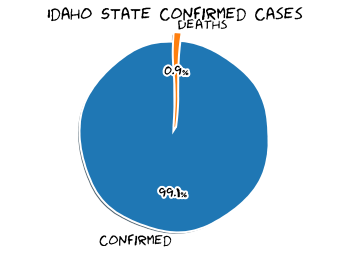

Idaho State Total Population
1754208
Idaho State Confirmed
10903 (0.621534048413871% of population)
Idaho State Deaths
102 (0.9355223333027607% of confirmed)



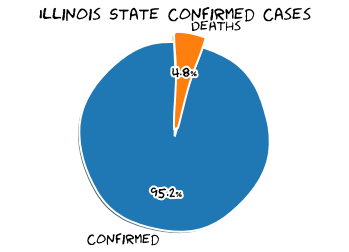

Illinois State Total Population
12741080
Illinois State Confirmed
155048 (1.2169141077522472% of population)
Illinois State Deaths
7388 (4.764976007429957% of confirmed)



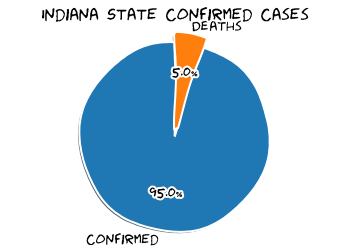

Indiana State Total Population
6691878
Indiana State Confirmed
51612 (0.771263313527234% of population)
Indiana State Deaths
2567 (4.973649538866931% of confirmed)



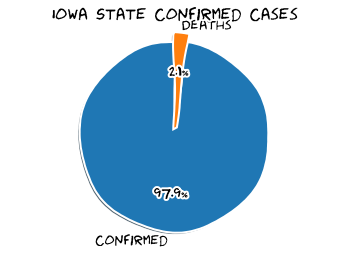

Iowa State Total Population
3156145
Iowa State Confirmed
35410 (1.1219383139874752% of population)
Iowa State Deaths
752 (2.123693871787631% of confirmed)



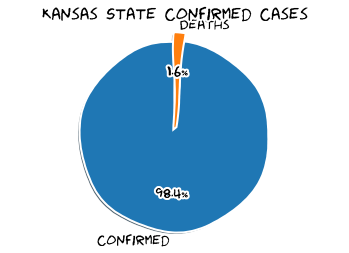

Kansas State Total Population
2911510
Kansas State Confirmed
18981 (0.6519297546633878% of population)
Kansas State Deaths
296 (1.5594541910331383% of confirmed)



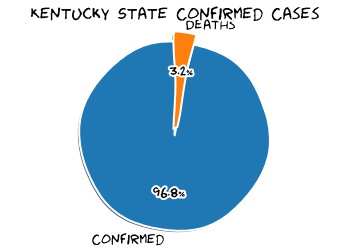

Kentucky State Total Population
4468402
Kentucky State Confirmed
19389 (0.4339135109150878% of population)
Kentucky State Deaths
625 (3.2234772293568517% of confirmed)



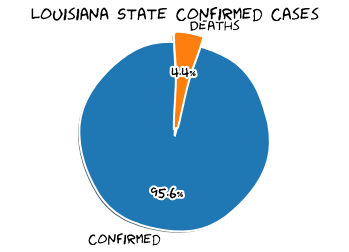

Louisiana State Total Population
4659978
Louisiana State Confirmed
78122 (1.676445682790777% of population)
Louisiana State Deaths
3416 (4.372647909679732% of confirmed)



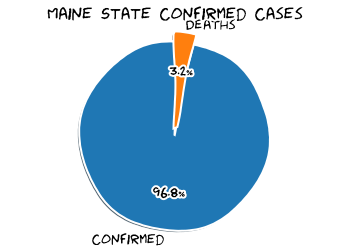

Maine State Total Population
1338404
Maine State Confirmed
3539 (0.26441941297246574% of population)
Maine State Deaths
114 (3.221248940378638% of confirmed)



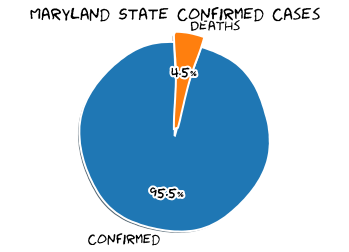

Maryland State Total Population
6042718
Maryland State Confirmed
73109 (1.209869466025057% of population)
Maryland State Deaths
3303 (4.5179116114295095% of confirmed)



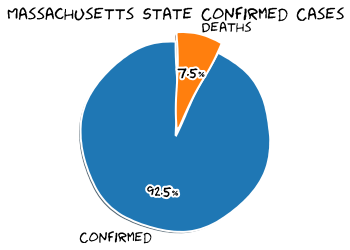

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
111597 (1.6168442611134588% of population)
Massachusetts State Deaths
8325 (7.459877953708433% of confirmed)



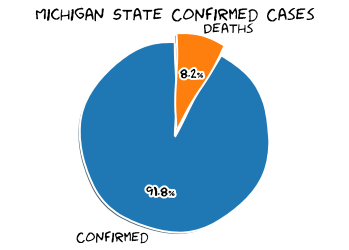

Michigan State Total Population
9995915
Michigan State Confirmed
76776 (0.7680737581301962% of population)
Michigan State Deaths
6314 (8.223924142961343% of confirmed)



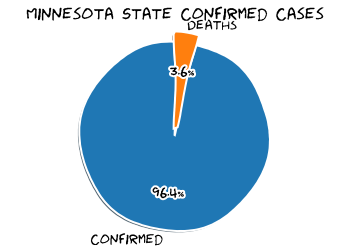

Minnesota State Total Population
5611179
Minnesota State Confirmed
42281 (0.7535136555080493% of population)
Minnesota State Deaths
1540 (3.642297958894066% of confirmed)



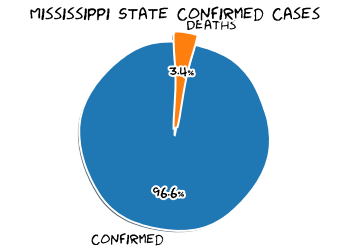

Mississippi State Total Population
2986530
Mississippi State Confirmed
36287 (1.2150221159673602% of population)
Mississippi State Deaths
1249 (3.4420040234794826% of confirmed)



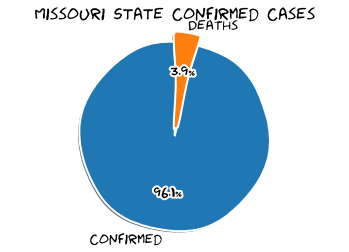

Missouri State Total Population
6126452
Missouri State Confirmed
27880 (0.4550757926447478% of population)
Missouri State Deaths
1092 (3.9167862266857965% of confirmed)



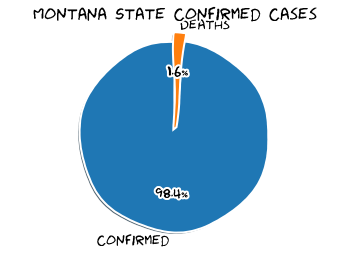

Montana State Total Population
1062305
Montana State Confirmed
1758 (0.1654891956641454% of population)
Montana State Deaths
29 (1.6496018202502845% of confirmed)



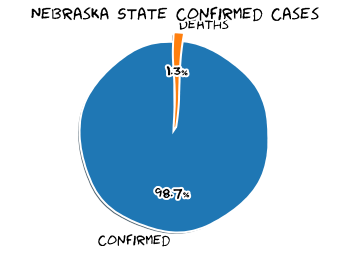

Nebraska State Total Population
1929268
Nebraska State Confirmed
21172 (1.0974110387981348% of population)
Nebraska State Deaths
285 (1.346117513697336% of confirmed)



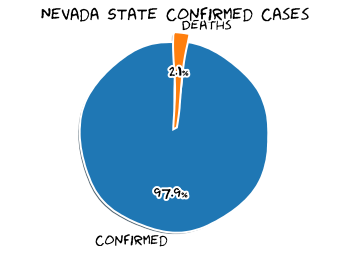

Nevada State Total Population
3034392
Nevada State Confirmed
27683 (0.9123079681201374% of population)
Nevada State Deaths
593 (2.1421088754831485% of confirmed)



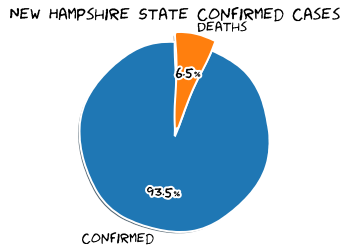

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
6054 (0.4463094323598667% of population)
New Hampshire State Deaths
391 (6.458539808391146% of confirmed)



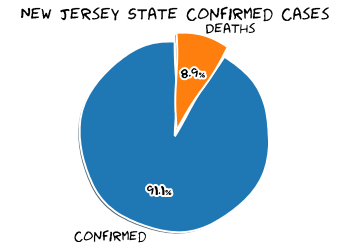

New Jersey State Total Population
8908520
New Jersey State Confirmed
175298 (1.9677567093074944% of population)
New Jersey State Deaths
15525 (8.856347476867962% of confirmed)



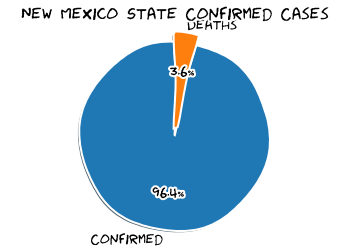

New Mexico State Total Population
2095428
New Mexico State Confirmed
15028 (0.7171804519172217% of population)
New Mexico State Deaths
545 (3.626563747671014% of confirmed)



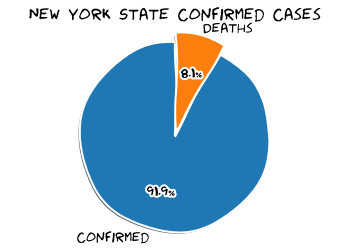

New York State Total Population
19542209
New York State Confirmed
401706 (2.055581331670335% of population)
New York State Deaths
32350 (8.053153301170509% of confirmed)



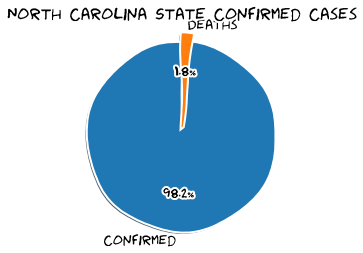

North Carolina State Total Population
10383620
North Carolina State Confirmed
85771 (0.8260221387146294% of population)
North Carolina State Deaths
1522 (1.774492544099987% of confirmed)



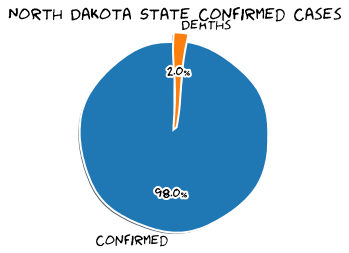

North Dakota State Total Population
760077
North Dakota State Confirmed
4334 (0.5702053870857821% of population)
North Dakota State Deaths
87 (2.007383479464698% of confirmed)



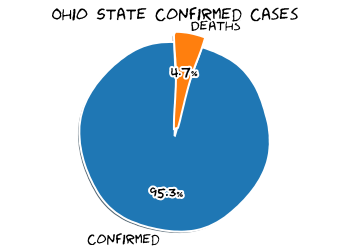

Ohio State Total Population
11689442
Ohio State Confirmed
65592 (0.5611217370341544% of population)
Ohio State Deaths
3058 (4.662153921209904% of confirmed)



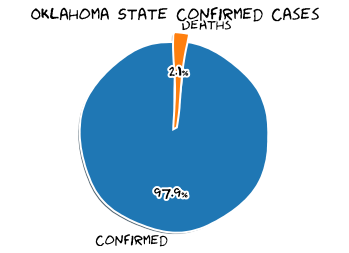

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
20235 (0.5131776461998352% of population)
Oklahoma State Deaths
422 (2.0854954287126266% of confirmed)



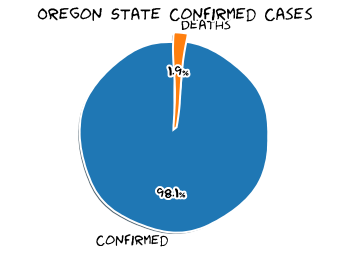

Oregon State Total Population
4190713
Oregon State Confirmed
12170 (0.2904040434169555% of population)
Oregon State Deaths
234 (1.922760887428102% of confirmed)



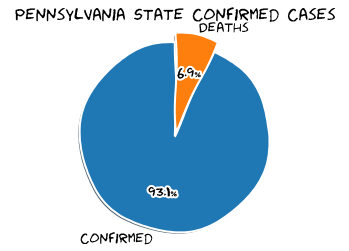

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
99794 (0.7792108415202239% of population)
Pennsylvania State Deaths
6904 (6.918251598292483% of confirmed)



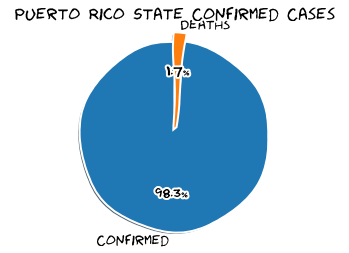

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
9654 (0.3021451554902066% of population)
Puerto Rico State Deaths
167 (1.7298529107105862% of confirmed)



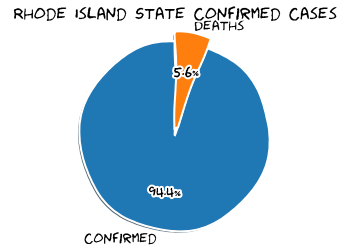

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
17312 (1.6373549982739297% of population)
Rhode Island State Deaths
976 (5.6377079482439925% of confirmed)



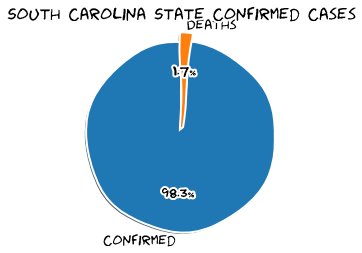

South Carolina State Total Population
5084127
South Carolina State Confirmed
56648 (1.1142129219038% of population)
South Carolina State Deaths
961 (1.696441180624206% of confirmed)



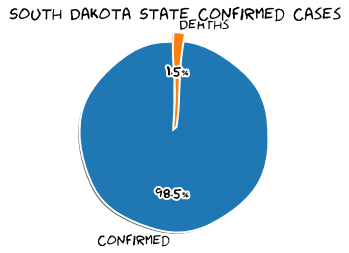

South Dakota State Total Population
882235
South Dakota State Confirmed
7499 (0.8500002833712106% of population)
South Dakota State Deaths
109 (1.4535271369515936% of confirmed)



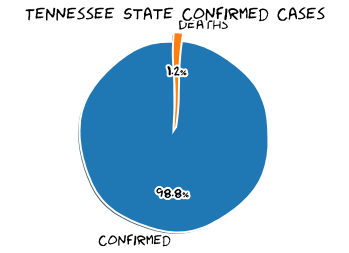

Tennessee State Total Population
6770010
Tennessee State Confirmed
61960 (0.9152128283414649% of population)
Tennessee State Deaths
741 (1.195932859909619% of confirmed)



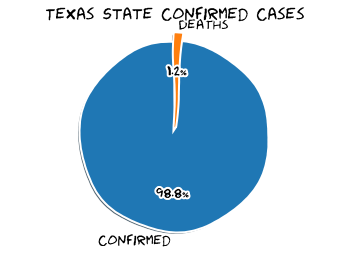

Texas State Total Population
28701845
Texas State Confirmed
262762 (0.9154881855156002% of population)
Texas State Deaths
3216 (1.223921267154307% of confirmed)



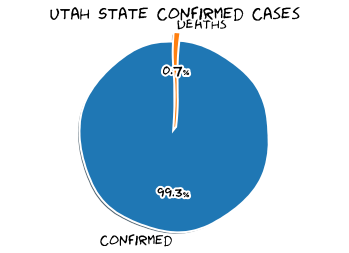

Utah State Total Population
3161105
Utah State Confirmed
29484 (0.932711820708265% of population)
Utah State Deaths
215 (0.7292090625423958% of confirmed)



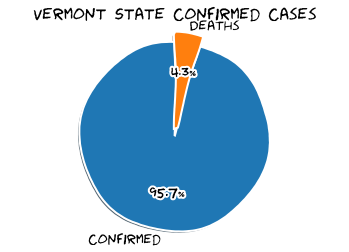

Vermont State Total Population
626299
Vermont State Confirmed
1296 (0.20692991686079654% of population)
Vermont State Deaths
56 (4.320987654320987% of confirmed)



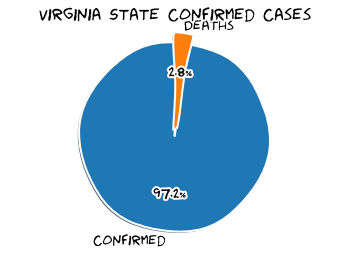

Virginia State Total Population
8517685
Virginia State Confirmed
70670 (0.8296855307516069% of population)
Virginia State Deaths
1966 (2.7819442479128345% of confirmed)



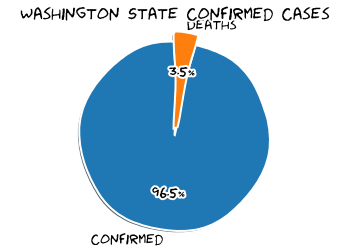

Washington State Total Population
7535591
Washington State Confirmed
40656 (0.539519727118948% of population)
Washington State Deaths
1438 (3.536993309720583% of confirmed)



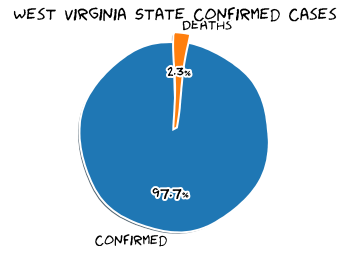

West Virginia State Total Population
1805832
West Virginia State Confirmed
4244 (0.2350163248851499% of population)
West Virginia State Deaths
96 (2.2620169651272386% of confirmed)



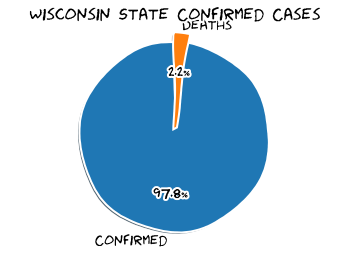

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
36448 (0.6269471691051003% of population)
Wisconsin State Deaths
820 (2.249780509218613% of confirmed)



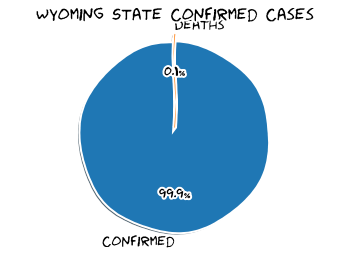

Wyoming State Total Population
577737
Wyoming State Confirmed
1862 (0.32229197714531005% of population)
Wyoming State Deaths
1 (0.05370569280343716% of confirmed)



In [10]:
for i in states:
    state_details(i)

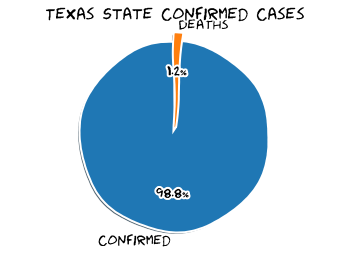

Texas State Total Population
28701845
Texas State Confirmed
262762 (0.9154881855156002% of population)
Texas State Deaths
3216 (1.223921267154307% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
3304942
US Deaths
134974

New York City Confirmed
219051
New York City Deaths
23283

Philippines Confirmed
57006
Philippines Deaths
1599



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 12945657},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 569871},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-07-13T12:34:33.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 7147807},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.22333378,-82.46170658,153,1,0,152,"Abbeville, South Carolina, US",623.8023402780609,0.6535947712418301
1,22001,Acadia,Louisiana,US,2020-07-13 04:43:04,30.295064899999996,-92.41419698,1339,45,0,1294,"Acadia, Louisiana, US",2158.111048432589,3.3607169529499625
2,51001,Accomack,Virginia,US,2020-07-13 04:43:04,37.76707161,-75.63234615,1042,14,0,1028,"Accomack, Virginia, US",3224.4089615051366,1.3435700575815739
3,16001,Ada,Idaho,US,2020-07-13 04:43:04,43.4526575,-116.24155159999998,4146,25,0,4121,"Ada, Idaho, US",860.9036373490147,0.602990834539315
4,19001,Adair,Iowa,US,2020-07-13 04:43:04,41.33075609,-94.47105874,17,0,0,17,"Adair, Iowa, US",237.69574944071587,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,,,,Yemen,2020-07-13 04:43:04,15.552726999999999,48.516388,1465,417,659,389,Yemen,4.911827170202825,28.4641638225256
3809,,,,Zambia,2020-07-13 04:43:04,-13.133897,27.849332,1895,42,1412,441,Zambia,10.307901085054816,2.216358839050132
3810,,,,Zimbabwe,2020-07-13 04:43:04,-19.015438,29.154857,985,18,328,639,Zimbabwe,6.627227597901813,1.8274111675126903
3811,16061,Lewis,Idaho,US,2020-07-10 02:34:22,46.23315327,-116.434146,1,0,0,1,"Lewis, Idaho, US",26.055237102657642,0.0


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1594640066000,40.767273,-73.971526,219051,0,23283,195768,New York City,36061,"New York City, New York, US",2627.513594,None,None,84036061,USA
1,California,US,1594640066000,34.308284,-118.228241,133549,0,3809,129740,Los Angeles,06037,"Los Angeles, California, US",1330.287644,None,None,84006037,USA
2,Illinois,US,1594640066000,41.841448,-87.816588,95557,0,4725,90832,Cook,17031,"Cook, Illinois, US",1855.391785,None,None,84017031,USA
3,Arizona,US,1594640066000,33.348359,-112.491815,80146,0,1133,79013,Maricopa,04013,"Maricopa, Arizona, US",1786.813882,None,None,84004013,USA
4,Florida,US,1594640066000,25.611236,-80.551706,64444,0,1139,63305,Miami-Dade,12086,"Miami-Dade, Florida, US",2371.933131,None,None,84012086,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,Idaho,US,1594640066000,NaN,NaN,1,0,0,1,Unassigned,90016,"Unassigned, Idaho, US",NaN,None,None,84090016,USA
3092,Kansas,US,1594640066000,39.784208,-97.087532,1,0,0,1,Washington,20201,"Washington, Kansas, US",18.497965,None,None,84020201,USA
3093,West Virginia,US,1594640066000,38.493709,-80.420202,1,0,0,1,Webster,54101,"Webster, West Virginia, US",12.324378,None,None,84054101,USA
3094,Wyoming,US,1594640066000,43.839612,-104.567488,1,0,0,1,Weston,56045,"Weston, Wyoming, US",14.436264,None,None,84056045,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1594640066000,40.767273,-73.971526,219051,0,23283,195768,New York City,36061,"New York City, New York, US",2627.513594,None,None,84036061,USA
6,New York,US,1594640066000,40.740665,-73.589419,42307,0,2190,40117,Nassau,36059,"Nassau, New York, US",3117.860691,None,None,84036059,USA
7,New York,US,1594640066000,40.883201,-72.801217,42028,0,1993,40035,Suffolk,36103,"Suffolk, New York, US",2846.266527,None,None,84036103,USA
8,New York,US,1594640066000,41.162784,-73.757417,35297,0,1435,33862,Westchester,36119,"Westchester, New York, US",3648.246109,None,None,84036119,USA
40,New York,US,1594640066000,41.150279,-74.025605,13716,0,670,13046,Rockland,36087,"Rockland, New York, US",4210.086897,None,None,84036087,USA
58,New York,US,1594640066000,41.403375,-74.302408,10835,0,484,10351,Orange,36071,"Orange, New York, US",2814.724373,None,None,84036071,USA
88,New York,US,1594640066000,42.762490,-78.730637,7742,0,644,7098,Erie,36029,"Erie, New York, US",842.710694,None,None,84036029,USA
148,New York,US,1594640066000,41.764861,-73.743567,4276,0,152,4124,Dutchess,36027,"Dutchess, New York, US",1453.344119,None,None,84036027,USA
151,New York,US,1594640066000,43.146389,-77.693229,4177,0,277,3900,Monroe,36055,"Monroe, New York, US",563.112555,None,None,84036055,USA
191,New York,US,1594640066000,43.004919,-76.199712,3124,0,190,2934,Onondaga,36067,"Onondaga, New York, US",678.351805,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

401706

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1594640066000,40.767273,-73.971526,219051,0,23283,195768,New York City,36061,"New York City, New York, US",2627.513594,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
48,None,Philippines,1594643673000,12.879721,121.774017,57006,20371,1599,35036.0,None,None,Philippines,52.021752,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
